In [1]:
import os
import sys

def add_to_sys_path(relative_path):
    abs_path = os.path.abspath(os.path.join(os.getcwd(), relative_path))
    if abs_path not in sys.path:
        sys.path.append(abs_path)

add_to_sys_path(os.path.join('..', '..', '..', 'Utils'))
add_to_sys_path(os.path.join('..', '..', '..', 'Model'))
add_to_sys_path(os.path.join('..', '..', '..', 'Biased Sampling'))

In [2]:
import pandas as pd

from TabNet import base_model as base_model_call
from model_data_processing import Data_Handler, Model_Metrics_Visualizer
from stealthy_sampling import *

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [3]:
data = pd.read_csv('../../../Dataset/Kaggle-data.csv')
data = data.drop(data.select_dtypes(include='object').columns, axis=1)
data = data.drop(columns=['ID', 'Unnamed: 57'])
protected_feature = 'Subsystem'

data = data.dropna(axis=0)
data.head()

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.


,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,224,8450,8.0,0,16896,8192,0,16947,4096,24576,...,1,3.492126,3.492126,3.492126,864.0,864.0,864,72,0,1
1,224,258,9.0,0,84480,25600,0,10973,4096,90112,...,1,3.486827,3.486827,3.486827,892.0,892.0,892,72,0,1
2,224,8450,8.0,0,4608,3584,0,6452,4096,12288,...,1,3.517270,3.517270,3.517270,952.0,952.0,952,72,0,1
3,224,8450,10.0,0,108544,15872,0,105021,4096,114688,...,2,3.270559,3.034188,3.506931,1032.0,972.0,1092,72,0,1
4,224,8226,48.0,0,513024,2048,0,520922,8192,524288,...,1,3.420977,3.420977,3.420977,954.0,954.0,954,0,0,1


In [4]:
x_train, x_test, y_train, y_test, feature_names, scaler = Data_Handler(
        df=data,
        target_column='legitimate',
        protected_feature=protected_feature,
        do_scaling=True,
        correlation_threshold=0.35,
        test_size=0.3,
        random_state=0
    )


Applying feature correlation removal...
Scaling only continuous numerical features (excluding heuristic categoricals and protected feature by default).
Features actually being scaled: ['SizeOfOptionalHeader', 'Characteristics', 'MajorLinkerVersion', 'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData', 'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion', 'MajorImageVersion', 'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders', 'CheckSum', 'SizeOfStackReserve', 'SectionsNb', 'SectionsMeanRawsize', 'SectionsMinRawsize', 'ImportsNb', 'ExportNb', 'ResourcesNb', 'ResourcesMeanEntropy', 'ResourcesMeanSize', 'LoadConfigurationSize', 'VersionInformationSize']


In [5]:
print(len(x_train.columns))
x_train.head()

29


,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,ImageBase,SectionAlignment,...,SectionsNb,SectionsMeanRawsize,SectionsMinRawsize,ImportsNb,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMeanSize,LoadConfigurationSize,VersionInformationSize
23720,-0.305154,0.485687,0.033611,-0.004386,-0.019331,-0.017655,-0.011831,-0.008912,-0.005751,-0.006757,...,0.038719,-0.014858,-0.059186,-0.146148,-0.079959,-0.151470,-0.200632,-0.007894,-0.020052,-0.977947
76198,-0.305154,-0.559387,-0.036640,-0.019715,-0.015673,-0.017626,-0.019790,-0.008912,-0.005751,-0.006757,...,0.038719,-0.021930,-0.060777,0.380521,-0.091228,-0.062156,0.788055,-0.006975,-0.020054,-0.977947
26039,-0.305154,-0.561048,0.021903,-0.020603,-0.019977,-0.017648,-0.019970,-0.008912,-0.005751,-0.006757,...,0.437017,-0.024194,-0.060777,-0.292445,-0.091228,-0.144027,0.389231,-0.007935,-0.020052,-0.977947
201594,-0.305154,-0.561048,0.010194,-0.019520,-0.005840,-0.017419,-0.019684,-0.008912,-0.005751,-0.006757,...,0.437017,-0.020145,-0.060777,0.424410,-0.091228,-0.002613,-0.255934,-0.006457,-0.020054,-0.977947
211321,-0.305154,-0.561048,0.010194,-0.014633,-0.007843,-0.017655,-0.016655,-0.008912,-0.005751,-0.006757,...,0.038719,-0.009999,-0.030535,0.007464,-0.091228,0.004829,2.330882,-0.004251,-0.020053,0.762113


Accuracy: 0.9572304563522632
Precision: 0.9572150703195952
Recall: 0.9572304563522632
F-1: 0.9570264788389448


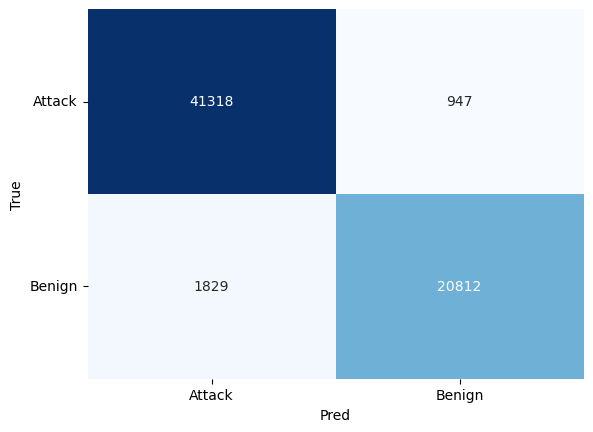

In [6]:
model = base_model_call(x_train, y_train, protected_feature, True)
y_pred = model.predict(x_test)
Model_Metrics_Visualizer(y_test, y_pred)

In [7]:
# Pass the DataFrame to the attacker class to maintain feature names for plotting
attacker = AdversarialSHAPBackgroundAttack(
        model=model,
        X_train=x_train,
        sensitive_feature_name=protected_feature,
        sensitive_feature_index=list(x_train.columns).index(protected_feature),
        explainer_type='deep',
        background_size=200,
        lambda_reg=1e-4,
        gamma_entropy=1e-7
    )

Running attack with DeepExplainer...


Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


[Before] Mean SHAP per feature:
[ 4.00578078e-02 -1.46709132e-01  2.59851166e-03  3.74052702e-04
 -2.84284686e-04 -2.46048588e-05 -2.47236562e-03 -8.87246885e-05
  1.61988436e-07 -2.75723616e-06 -4.48619014e-03  2.50954381e-05
  1.61730091e-02 -1.24771745e-02 -2.38867731e-04 -9.02695380e-03
  3.14168652e-02  1.66102246e-02  2.60513448e-07 -9.15245678e-02
  4.43301413e-04  3.75312173e-03  1.43170255e-02 -3.27416595e-03
  6.18174098e-02  1.78928639e-02  1.12895682e-04  2.22327343e-08
  1.76171123e-02]


Converting A to a CSC (compressed sparse column) matrix; may take a while.
Converting P to a CSC (compressed sparse column) matrix; may take a while.
Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


Weight stats: min=0.0024137311647084102, max=0.005263002953702075, mean=0.005000000000000965
[After] Mean SHAP per feature:
[-6.01511857e-02  2.26624883e-01  6.07000594e-03  3.73626855e-04
  1.00000614e-04  2.26843698e-05 -1.30000113e-04  6.00831037e-05
 -1.18076746e-07  1.30337315e-06 -1.29473930e-02 -6.02882097e-05
  1.67080632e-02 -4.08848070e-02 -2.01682016e-04  2.90081539e-02
  1.28787757e-01  1.25742911e-01  4.89544489e-07 -4.77816282e-02
  1.91578413e-04 -1.61877936e-02  3.41780894e-02  4.83227606e-03
 -7.07647843e-02 -7.48779458e-02  2.62880760e-04 -4.73475750e-08
  3.61510222e-02]


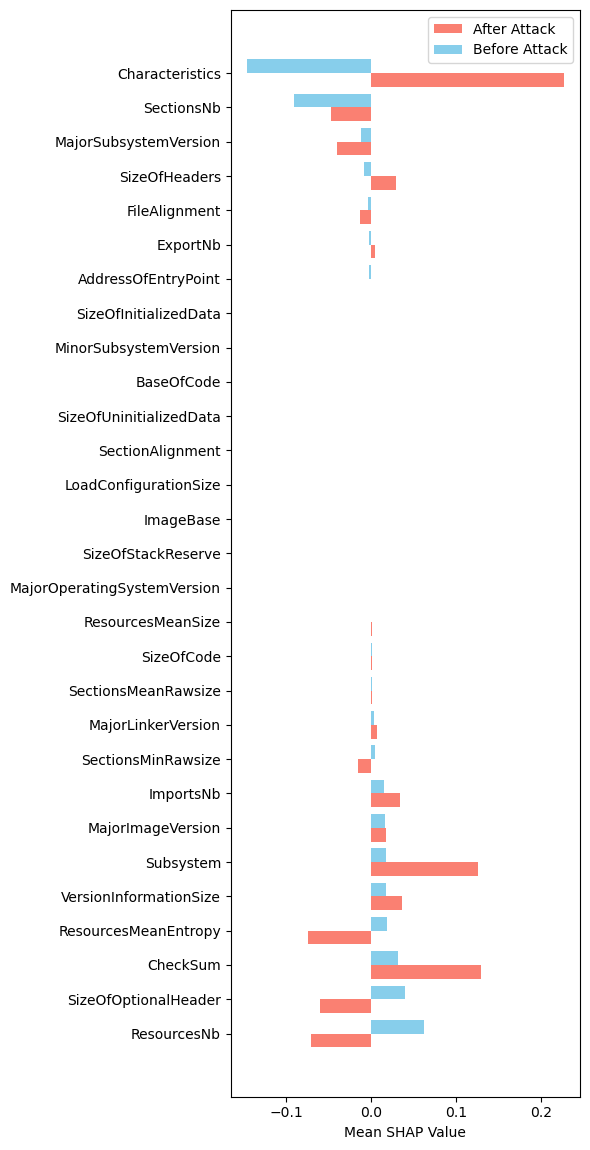

In [8]:
biased_weights, before, after = attacker.run_attack()
attacker.plot_shap_comparison(before, after)

In [9]:
print(f"Sensitive feature '{protected_feature}' importance before attack: {before[attacker.sensitive_feature_index]:.4f}")
print(f"Sensitive feature '{protected_feature}' importance after attack: {after[attacker.sensitive_feature_index]:.4f}")
    
change = after[attacker.sensitive_feature_index] - before[attacker.sensitive_feature_index]
pct_change = (change / before[attacker.sensitive_feature_index] * 100) if before[attacker.sensitive_feature_index] != 0 else float('inf')
print(f"Change in importance: {change:.4f} ({pct_change:.2f}%)")

Sensitive feature 'Subsystem' importance before attack: 0.0166
Sensitive feature 'Subsystem' importance after attack: 0.1257
Change in importance: 0.1091 (657.02%)
